In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

## 1.Data (Preparing and Loading)
data can be anything in machine learning:
* Excel Speadsheet
* Images of any kind
* Videos
* Audio
* DNA!!
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

we'll use linear regression formula to make a straight line with known **parameters**.

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3



#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Lets create a training and test set for our data

In [4]:
# Create train/test split

train_split = int(0.8 * len(X)) #80% for training and 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

this is where the data  explore's motto comes in!!

"Visualize!, Visualize!, Visualize!"

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  #Plot training data in blue.
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show The Legend
  plt.legend(prop={"size":14});


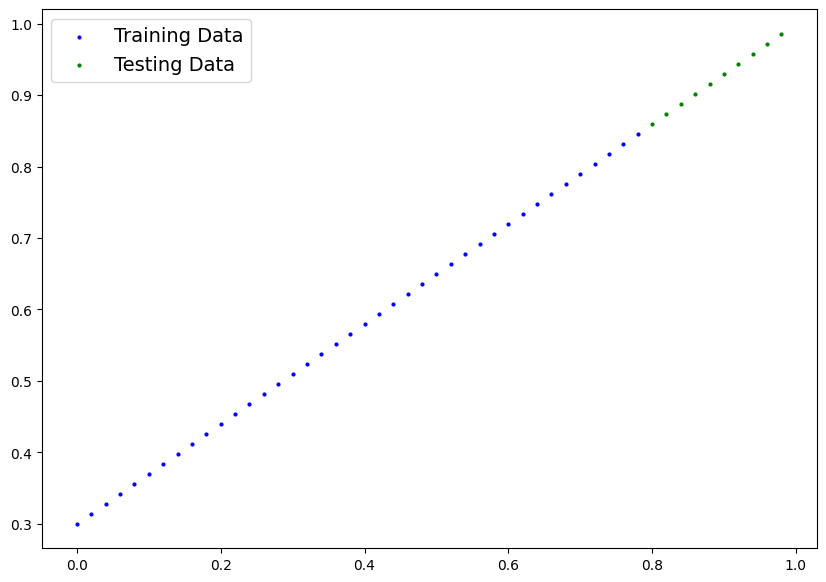

In [6]:
plot_predictions()

## 2. Building our first PyTorch model:

what our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to the ideal values)

How does it do so ?
Through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [7]:
# Create linear Regression model class
from torch import nn #nn stands for neural network
class LinearRegressionModel(nn.Module): # <= almost everything in pytorch inherrits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad = True,
                                             dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  # Forward method to define the computation in our model
  def forward(self, x: torch.tensor) -> torch.Tensor: #,= "x" is the input data
    return self.weights * x + self.bias #This is the linear Regression formula

### PyTorch model building essentials

* torch.nn - contains all of the bulding blocks for the computational graphs
* torch.nn.Patrameter - what patamater should our model try and learn, often a pytorch layer from torch.nn
* torch.nn.Module - the base class for all neural network modules, if you subclass it , you should overwrite forward().
* torch.optim - this is where the optimizers in pytorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what will happen in forward computation

### Checking the content of our pytorch model

we can check our model paramaters or whats inside our model using **.parameters()**


In [8]:
# Create a random_seed
torch.manual_seed(42)

#Create an instance of our model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using torch.inference_mode()

To check our models Predictive Power, lets see how well it predicts 'y_test', based one 'x_test'.
when we pass data through our model, its going to run it through the 'forward()' method.


In [10]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

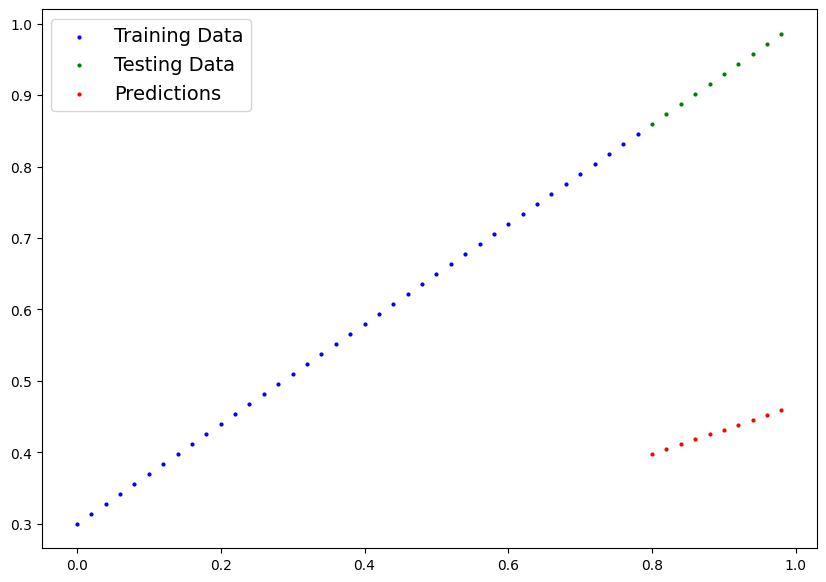

In [11]:
plot_predictions(predictions = y_preds)

## 3.Train a model

The whole idea of training is for a model to move from some *unknown* parameter (these may be random) to some *known* parameter.

or in other wwords, from a poor representation of the data to a better representation of the data.

One way to measure how poor or wrong your models predictions are, is to use a loss function.

* Note: Loss function may also be called cost  function or criterion in different areas.

Things we need to train:

* **Loss Function:** A function to measure how wrong our models predictions are to the ideal outputs. **Lower is Better**
* **Optimizers:** Takes into account the loss of a model and adjusts the Model's Parameters (e.g. weight & Bias) to improve the loss function.

inside the optimizer you'll often have to set two parameters:

* params - the model parameters you'd like to optimize for example "params = model_0.parameters()"
* lr (Learning Rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step.

And specifically for PyTorch we need:
* A training loop
* A testing loop

In [12]:
list(model_0.parameters() ), list(model_0.eval().parameters())

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [13]:
# Check out our model's parameter (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# Setup a loss Function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic Gradient Descent)
optimizer =  torch.optim.SGD(params = model_0.parameters() ,
                             lr = 0.01) #Learning-Rate = possibly the most important Hyperparameter You can get

### Building a training loop (and a testing loop) in PyTorch
A couple  of things we need in a training loop:
0. loop through the data
1. forward pass (this envolves data moving through our model's "forward()" functions.) - also called forward propagation
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backwards through the network (**backpropagation**)
5. optimizer step - use the optimizer to adjust our models parammeters to try and improve the loss (**gradient descent**)


In [15]:
torch.manual_seed(42)
# an epoch is one loop through the data (hyperparameter)
epochs = 200

# Create an empty list to keep track of our data
epoch_count =  []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() #train mode in Pytorch sets all parameters that require gradients to require gradients

  #model_0.eval() #turns off gradient tracking

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation on the loss with respect to the parameters of the
  # model
  loss.backward()


  # 5. Step the optimizier (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loops

  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode():
    # turns off gradient tracking & a couple more things
    # fo the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 ==  0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss.numpy())
    print(f"Epoch : {epoch} | Loss: {loss}| Test_loss: {test_loss}")




Epoch : 0 | Loss: 0.31288138031959534| Test_loss: 0.48106518387794495
Epoch : 10 | Loss: 0.1976713240146637| Test_loss: 0.3463551998138428
Epoch : 20 | Loss: 0.08908725529909134| Test_loss: 0.21729660034179688
Epoch : 30 | Loss: 0.053148526698350906| Test_loss: 0.14464017748832703
Epoch : 40 | Loss: 0.04543796554207802| Test_loss: 0.11360953003168106
Epoch : 50 | Loss: 0.04167863354086876| Test_loss: 0.09919948130846024
Epoch : 60 | Loss: 0.03818932920694351| Test_loss: 0.08886633068323135
Epoch : 70 | Loss: 0.03476089984178543| Test_loss: 0.0805937647819519
Epoch : 80 | Loss: 0.03132382780313492| Test_loss: 0.07232122868299484
Epoch : 90 | Loss: 0.02788739837706089| Test_loss: 0.06473556160926819
Epoch : 100 | Loss: 0.024458957836031914| Test_loss: 0.05646304413676262
Epoch : 110 | Loss: 0.021020207554101944| Test_loss: 0.04819049686193466
Epoch : 120 | Loss: 0.01758546568453312| Test_loss: 0.04060482233762741
Epoch : 130 | Loss: 0.014155393466353416| Test_loss: 0.03233227878808975
Ep

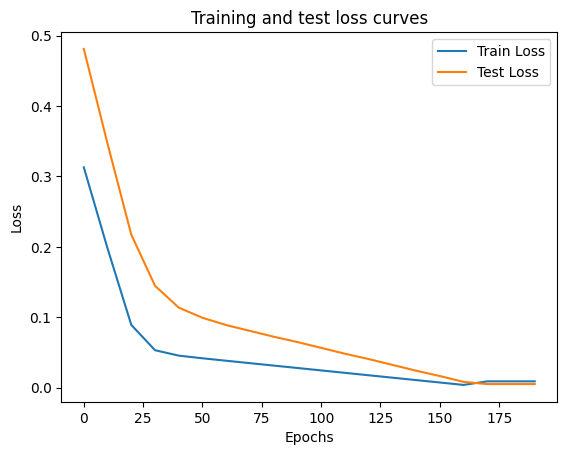

In [16]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [17]:
 model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [18]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

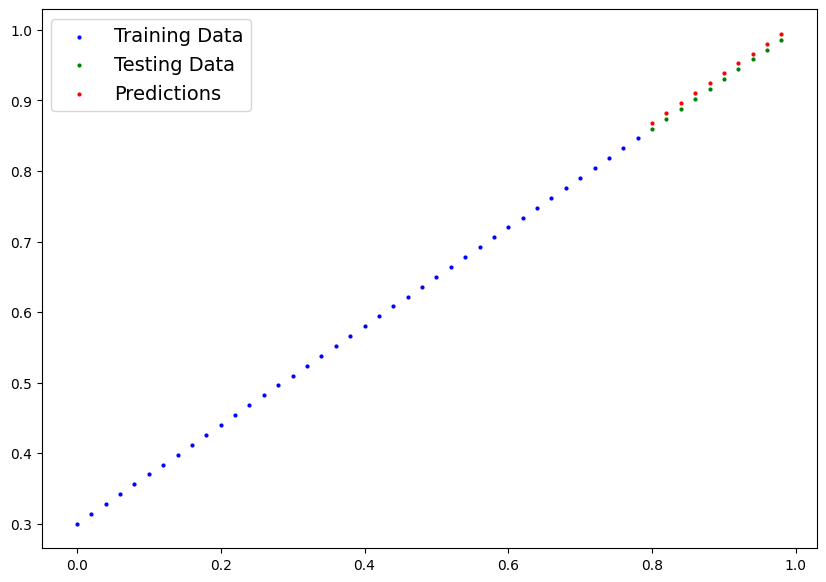

In [19]:
plot_predictions(predictions=y_preds_new)

## Saving A model in pytorch
There are three main methods for saving and loading models in pytorch:

1. torch.save() - allows you to save a pytorch object in python's pickle format
2. torch.load() - alows you to load a saved pytorch project
3. torch.nn.Module.load_state_dict() - this allows you to load a models saved state dictionary


In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
!pip install --upgrade pathlib

In [22]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create Models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to : models/01_pytorch_workflow_model_0.pth


In [23]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 26 16:09 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our model's 'state_dict()' rather than the entire model, we'll create a new instance of our model class and load the saved **state_dict()** into that.

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model 0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)


In [29]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Lets go to through the steps  above and see it all in one place.

In [30]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check out pytorch version
torch.__version__

'2.2.1+cu121'

Create device-agnostic Code.

this means if we've got access to a GPU, our code will use it (for potentially faster computing).

if no gpu is available , the code will default to CPU



In [31]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## 6.1 Data

In [32]:
# create a Data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# Create X and y:
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias


X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
X_test = X[train_split:]
y_train = y[:train_split]
y_test = y[train_split:]
len(X_train), len(X_test)

(40, 10)

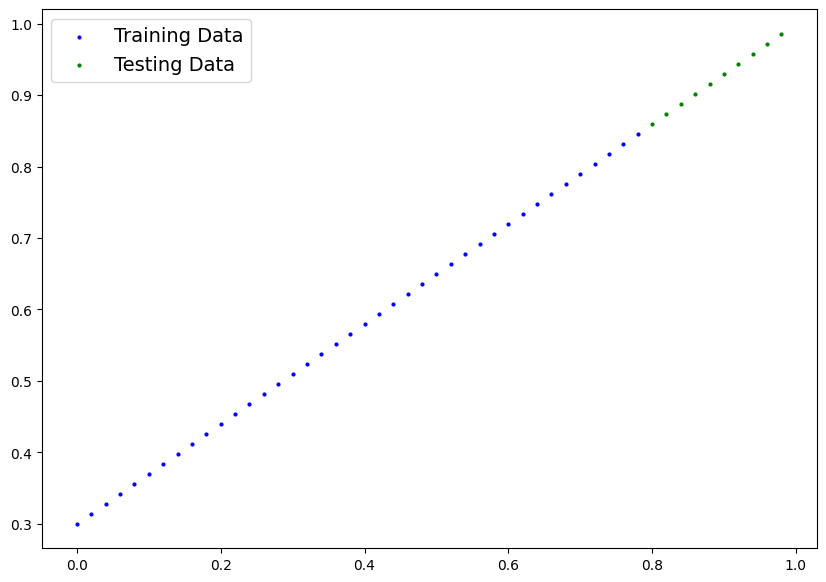

In [34]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [35]:
from torch import nn
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

    #self.weight = nn.Parameter(torch.randn(1,
                                           #requires_grad=True,
                                           #dtype=torch.float))
    #self.bias = nn.Parameter(torch.randn(1,
                                         #requires_grad=True,
                                         #dtype=torch.float))
  def forward(self,x :torch.tensor) -> torch.tensor : #'x -> torch.tensor' means thats "x" is going to return a torch.tensor
    return self.linear_layer(x)

In [36]:
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# 6.3 Training

for training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [39]:
# Setup a loss function :
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [40]:
# Lets write a training loop :
torch.manual_seed(42)

epochs = 200

# Put data on the target device:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()

  # 1.Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
  # Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch : 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch : 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch : 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch : 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch : 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch : 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch : 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch : 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch : 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch : 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch : 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch : 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch : 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch : 130 | Loss: 0.0012645035749301314 | Test Loss: 0.0

### 6.4 Making and evaluating predictions

In [43]:
# Turn the model into evaluation mode
model_1.eval()


# Make predictions on the taste data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

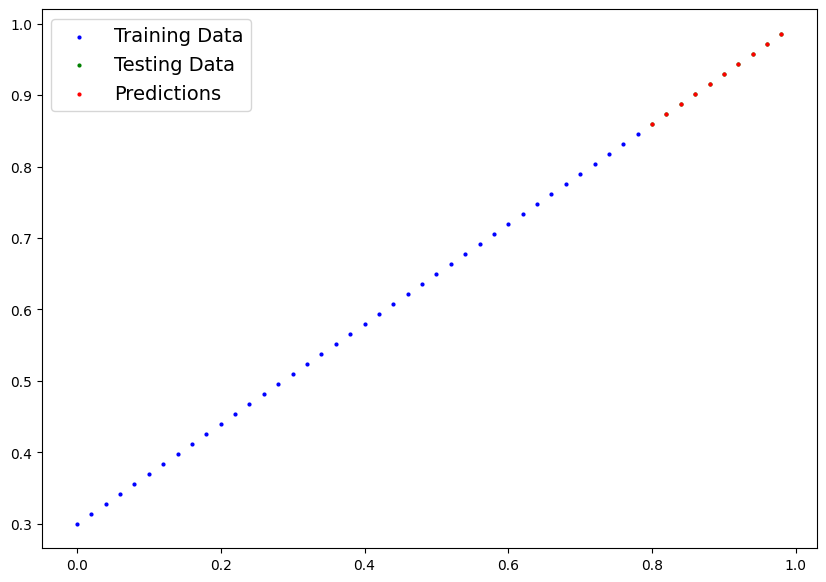

In [47]:
# check out or models predicitons visually

plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and Loading a trained model

In [62]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [54]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [63]:
# Load a pytorch model

# Create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load the model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [64]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [65]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [68]:
# Evaluate Loaded model
loaded_model_1.eval()
with torch.inference_mode():
  y_preds = loaded_model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')